<a href="https://colab.research.google.com/github/merrouchi37/ConvCoroNet/blob/main/ConvCoroNet_evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
from google.colab import drive
drive.mount('/content/drive/')
os.chdir("/content/drive/My Drive/app")

Mounted at /content/drive/


In [ ]:
!pip install mlxtend --upgrade --no-deps

     |████████████████████████████████| 1.3MB 11.3MB/s 
  Found existing installation: mlxtend 0.14.0
    Uninstalling mlxtend-0.14.0:
      Successfully uninstalled mlxtend-0.14.0


In [ ]:

import tensorflow
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
import os
import math

In [ ]:
data_train = np.load('data_train_p_224.npy')
labels_train = np.load('labels_train_p_224.npy')
data_train.shape

(1500, 224, 224, 3)

In [ ]:
#Shuffling Data
indx=np.arange(data_train.shape[0])          
np.random.shuffle(indx)
data_train = data_train[indx]
labels_train = labels_train[indx]

In [ ]:
labels = np.argmax(labels_train, axis=1)
labels.shape

(1500,)

10/10 [==============================] - 1s 64ms/step - loss: 0.0107 - acc: 1.0000
[0.010713521391153336, 1.0]
[INFO] evaluating network...Fold: 1
              precision    recall  f1-score   support

       covid       1.00      1.00      1.00       100
      normal       1.00      1.00      1.00       100
       viral       1.00      1.00      1.00       100

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



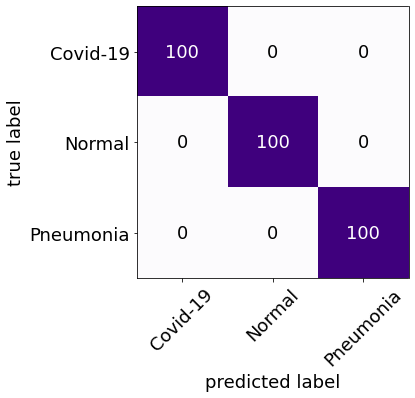

<Figure size 432x288 with 0 Axes>

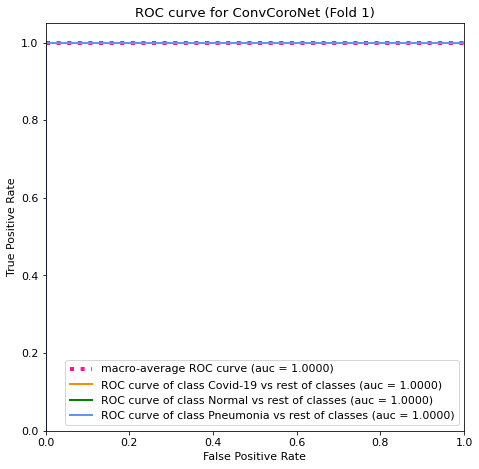

<Figure size 432x288 with 0 Axes>

score fold 1: 1.0
10/10 [==============================] - 1s 62ms/step - loss: 0.0238 - acc: 0.9933
[0.023773659020662308, 0.9933333396911621]
[INFO] evaluating network...Fold: 2
              precision    recall  f1-score   support

       covid       0.99      1.00      1.00       100
      normal       0.99      1.00      1.00       100
       viral       1.00      0.98      0.99       100

    accuracy                           0.99       300
   macro avg       0.99      0.99      0.99       300
weighted avg       0.99      0.99      0.99       300



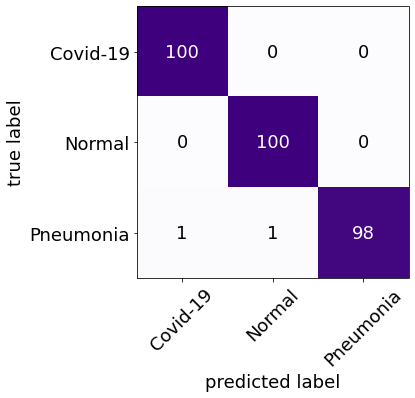

<Figure size 432x288 with 0 Axes>

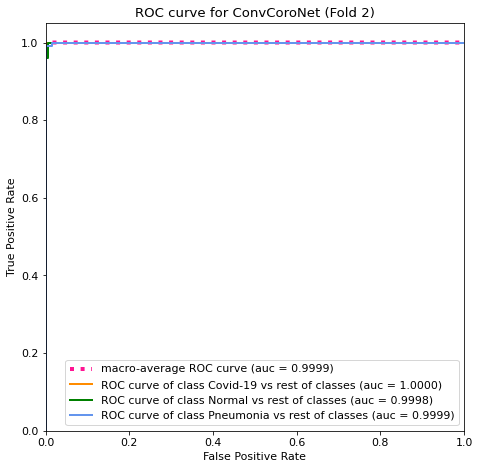

<Figure size 432x288 with 0 Axes>

score fold 2: 0.9998833333333333
10/10 [==============================] - 1s 63ms/step - loss: 0.0077 - acc: 1.0000
[0.007666173856705427, 1.0]
[INFO] evaluating network...Fold: 3
              precision    recall  f1-score   support

       covid       1.00      1.00      1.00       100
      normal       1.00      1.00      1.00       100
       viral       1.00      1.00      1.00       100

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



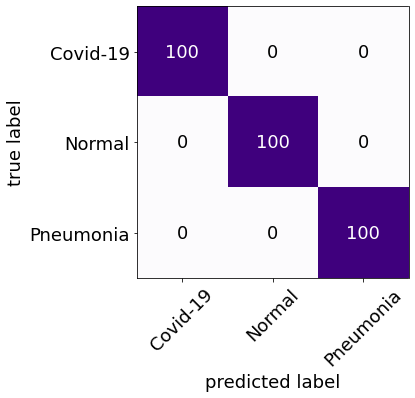

<Figure size 432x288 with 0 Axes>

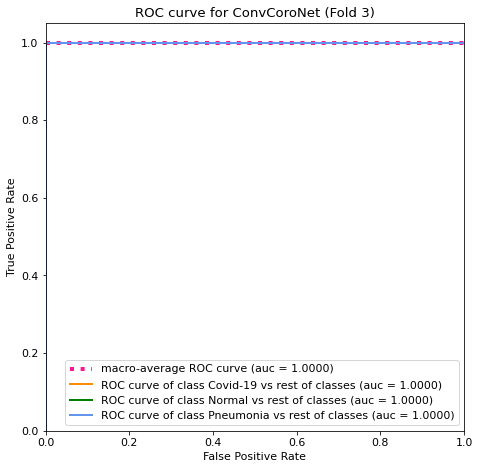

<Figure size 432x288 with 0 Axes>

score fold 3: 1.0
10/10 [==============================] - 1s 64ms/step - loss: 0.0048 - acc: 1.0000
[0.0047799753956496716, 1.0]
[INFO] evaluating network...Fold: 4
              precision    recall  f1-score   support

       covid       1.00      1.00      1.00       100
      normal       1.00      1.00      1.00       100
       viral       1.00      1.00      1.00       100

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



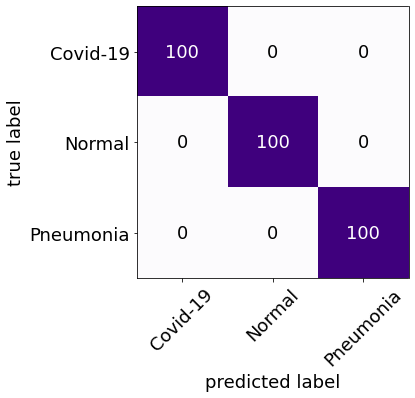

<Figure size 432x288 with 0 Axes>

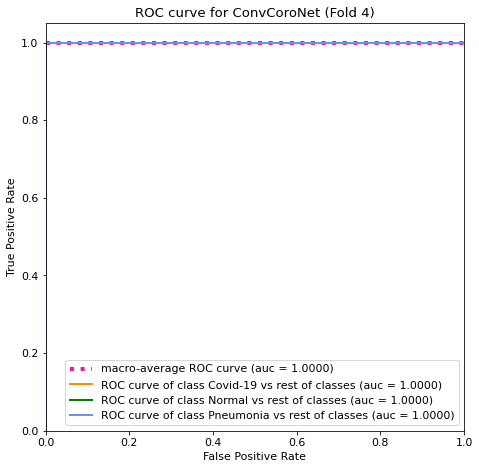

<Figure size 432x288 with 0 Axes>

score fold 4: 1.0
10/10 [==============================] - 1s 66ms/step - loss: 0.0205 - acc: 0.9933
[0.020461326465010643, 0.9933333396911621]
[INFO] evaluating network...Fold: 5
              precision    recall  f1-score   support

       covid       1.00      0.99      0.99       100
      normal       1.00      0.99      0.99       100
       viral       0.98      1.00      0.99       100

    accuracy                           0.99       300
   macro avg       0.99      0.99      0.99       300
weighted avg       0.99      0.99      0.99       300



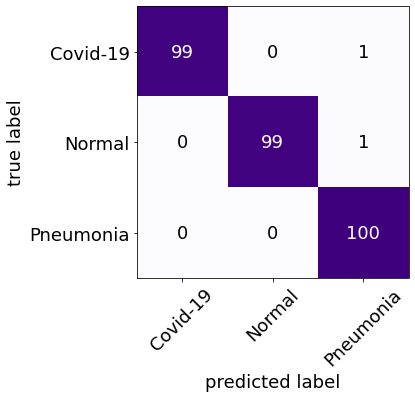

<Figure size 432x288 with 0 Axes>

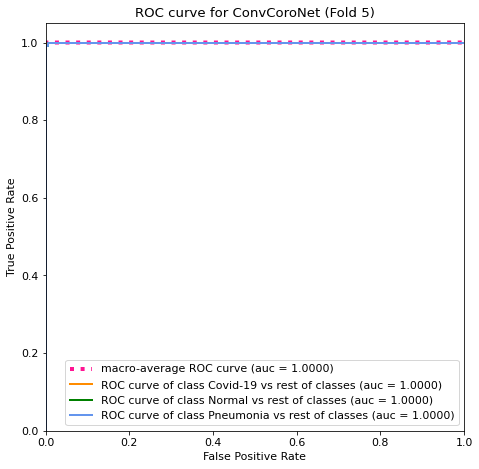

<Figure size 432x288 with 0 Axes>

score fold 5: 0.9999666666666668
Average AUC: 0.99997


In [ ]:
from sklearn.metrics import roc_auc_score

from sklearn.model_selection import KFold, StratifiedKFold
skf = StratifiedKFold(n_splits = 5, random_state = 7, shuffle = True)

from tensorflow.keras.models import load_model

from utils import roc_curv_plot
from utils import evaluation_metrics
base_model = "InceptionV3"
save_dir = 'covid19_models_cross_val8/'
fold_var = 1
aucs = 0.0

tensorflow.keras.backend.clear_session()
for train_index, val_index in skf.split(np.zeros(len(data_train)),labels):
  
  training_data = data_train[train_index]
  training_labels = labels_train[train_index]
  validation_data = data_train[val_index]
  validation_labels = labels_train[val_index]

  model = load_model(save_dir + 'model_' + base_model + '-' + str(fold_var) + '.h5')
  print(model.evaluate(validation_data, validation_labels))

  evaluation_metrics(model, validation_data, validation_labels, fold_var, 10)
  
  predIdxs = model.predict(validation_data, batch_size=10)

  plt.figure()
  plt.show()

  roc_curv_plot(validation_labels, predIdxs, fold_var)

  plt.figure()
  plt.show()

  auc = roc_auc_score(validation_labels, predIdxs, multi_class='ovr', average='macro')
  aucs = aucs + auc
  print("score fold " + str(fold_var) + ": " + str(auc))
  
  tensorflow.keras.backend.clear_session()
    
  fold_var = fold_var + 1
aucs = np.array(aucs)
print("Average AUC: " + str(aucs/5.0))